In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load and split into train and test dataset
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
len(y_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

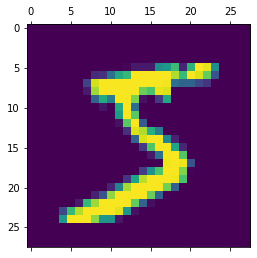

In [9]:
plt.matshow(X_train[0])

In [10]:
# y_train[0] value
y_train[0]

5

In [11]:
# dividing each element with 255 to scale its value
# 255 because array element lies b/w 0 to 255
X_train= X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

## Creating Model

In [15]:
# creating neural network
# 10 is output layer length
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10,  activation= 'sigmoid')
])

In [16]:
# keras.layers.Flatten(input_shape=(28, 28)) if don't want to flattend dataset
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [18]:
# epoch is no of iteration NN will run training data
model.fit(X_train_flattened, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2724 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1223 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9840


In [20]:
# evaluating accuracy on test dataset
model.evaluate(X_test_flattened, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9757


[0.07545479387044907, 0.9757000207901001]

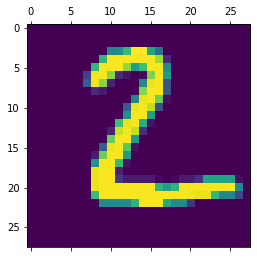

In [21]:
# prediction
plt.matshow(X_test[1])

In [23]:
# predict for all values
y_predicted= model.predict(X_test_flattened)
y_predicted[1]

array([3.4228817e-06, 9.9032652e-01, 9.9999797e-01, 8.8028598e-01,
       8.0326190e-09, 8.0681741e-02, 4.7013164e-03, 6.8599348e-10,
       7.1937895e-01, 2.9513026e-06], dtype=float32)

In [24]:
# finding max from y_predicted
np.argmax(y_predicted[1])

2

In [25]:
# y_predicted is whole number we want integer value
# first 5 prediction
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
# actual data
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [27]:
# confusion matrix
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    1,    6,    5,    1,    4,    0],
       [   0, 1123,    3,    1,    0,    0,    1,    0,    7,    0],
       [   4,    1,  998,    6,    4,    0,    2,    2,   15,    0],
       [   0,    1,    1,  996,    0,    2,    0,    3,    4,    3],
       [   0,    0,    4,    0,  966,    0,    1,    1,    1,    9],
       [   1,    0,    0,    9,    1,  872,    3,    0,    5,    1],
       [   5,    3,    2,    1,    5,   11,  924,    1,    6,    0],
       [   0,   10,    8,    8,    3,    1,    0,  985,    4,    9],
       [   0,    0,    1,    9,    2,    2,    0,    2,  956,    2],
       [   0,    2,    0,    4,   11,    5,    1,    6,    4,  976]])>

Text(69.0, 0.5, 'Truth')

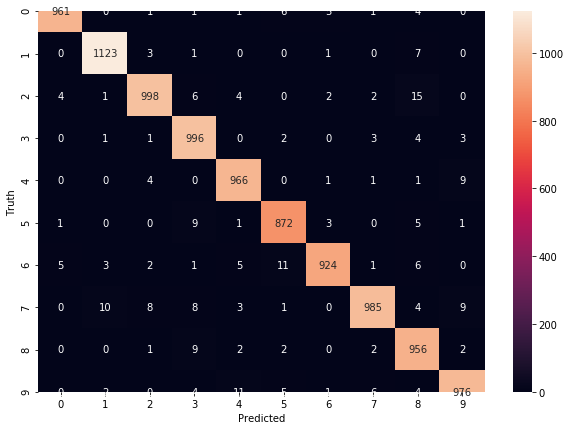

In [28]:
# visualizing confusion matrix using heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding more hidden layers

In [29]:
# Adding hidden layer
# 100 is no neuron in hidden layer & 10 is no of neuron in output layer 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# epoch is no of iteration NN will run training data
model.fit(X_train_flattened, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2788 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1278 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0883 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9840


In [30]:
# evaluating accuracy on test dataset
model.evaluate(X_test_flattened, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9759


[0.07928275316953659, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

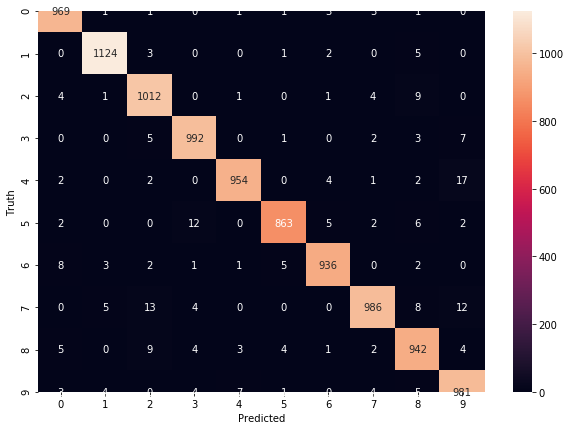

In [31]:
# confusion matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
# first 100 prediction
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:100]

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9]